In [1]:
import requests
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import json
from config import weather_api_key

In [2]:
url = "https://api.openweathermap.org/data/3.0/onecall/timemachine?"
units = "imperial"

# Reading CSV Data

In [3]:
# Reading the CSV
uber_csv = pd.read_csv("Resources/uber.csv")

uber_df = pd.DataFrame(uber_csv)

uber_df.head()



,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
# Renaming the headers
uber_df.rename(columns = {'Unnamed: 0':'ID', 'key':'N/A', 'fare_amount':'Charge', "pickup_datetime":"Pickup Time",  "pickup_longitude": "Pickup Lon", "pickup_latitude":"Pickup Lat",  
                          "dropoff_longitude": "Dropoff Lon", "dropoff_latitude": "Dropoff Lat", "passenger_count": "Passenger Count"}, inplace = True)

uber_df.head()



,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
# Grabbing a sample of the data
uber_df3 = uber_df.sample(n=5)
uber_df3.head()

,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count
45123,47473782,2011-11-05 23:23:18.0000001,12.9,2011-11-05 23:23:18 UTC,-73.990698,40.719430,-73.956764,40.694519,4
151060,40677560,2013-09-23 09:24:51.0000001,5.0,2013-09-23 09:24:51 UTC,-73.983716,40.721517,-73.988484,40.728105,1
95200,7522168,2010-02-12 05:53:50.0000001,4.5,2010-02-12 05:53:50 UTC,-73.979260,40.776585,-73.987670,40.767097,1
197616,13683981,2010-12-01 14:13:57.0000002,12.9,2010-12-01 14:13:57 UTC,-73.989060,40.748939,-73.968944,40.760488,1
10970,37602318,2010-08-02 06:32:00.00000069,12.9,2010-08-02 06:32:00 UTC,-73.965573,40.805857,-73.973958,40.759125,5


# Formatting Data

In [6]:
# Formatting the date step one
uber_df3['Date Formatted'] = (pd.to_datetime(uber_df3['Pickup Time'], yearfirst=True, utc=True)) 
 
uber_df3.head()


,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted
45123,47473782,2011-11-05 23:23:18.0000001,12.9,2011-11-05 23:23:18 UTC,-73.990698,40.719430,-73.956764,40.694519,4,2011-11-05 23:23:18+00:00
151060,40677560,2013-09-23 09:24:51.0000001,5.0,2013-09-23 09:24:51 UTC,-73.983716,40.721517,-73.988484,40.728105,1,2013-09-23 09:24:51+00:00
95200,7522168,2010-02-12 05:53:50.0000001,4.5,2010-02-12 05:53:50 UTC,-73.979260,40.776585,-73.987670,40.767097,1,2010-02-12 05:53:50+00:00
197616,13683981,2010-12-01 14:13:57.0000002,12.9,2010-12-01 14:13:57 UTC,-73.989060,40.748939,-73.968944,40.760488,1,2010-12-01 14:13:57+00:00
10970,37602318,2010-08-02 06:32:00.00000069,12.9,2010-08-02 06:32:00 UTC,-73.965573,40.805857,-73.973958,40.759125,5,2010-08-02 06:32:00+00:00


In [7]:
# Final Formatted date added to dataframe
uber_df3['Date Formatted Final'] = (uber_df3["Date Formatted"] - pd.Timestamp("1970-01-01", tz="UTC")) // pd.Timedelta('1s')

uber_df3.head()

,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted,Date Formatted Final
45123,47473782,2011-11-05 23:23:18.0000001,12.9,2011-11-05 23:23:18 UTC,-73.990698,40.719430,-73.956764,40.694519,4,2011-11-05 23:23:18+00:00,1320535398
151060,40677560,2013-09-23 09:24:51.0000001,5.0,2013-09-23 09:24:51 UTC,-73.983716,40.721517,-73.988484,40.728105,1,2013-09-23 09:24:51+00:00,1379928291
95200,7522168,2010-02-12 05:53:50.0000001,4.5,2010-02-12 05:53:50 UTC,-73.979260,40.776585,-73.987670,40.767097,1,2010-02-12 05:53:50+00:00,1265954030
197616,13683981,2010-12-01 14:13:57.0000002,12.9,2010-12-01 14:13:57 UTC,-73.989060,40.748939,-73.968944,40.760488,1,2010-12-01 14:13:57+00:00,1291212837
10970,37602318,2010-08-02 06:32:00.00000069,12.9,2010-08-02 06:32:00 UTC,-73.965573,40.805857,-73.973958,40.759125,5,2010-08-02 06:32:00+00:00,1280730720


In [8]:
#Creating the clean dataframe
clean_df = uber_df3[["ID", "Charge", "Pickup Lon", "Pickup Lat", "Dropoff Lon", "Dropoff Lat", "Passenger Count", "Date Formatted Final" ]]


clean_df.head()

,ID,Charge,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted Final
45123,47473782,12.9,-73.990698,40.719430,-73.956764,40.694519,4,1320535398
151060,40677560,5.0,-73.983716,40.721517,-73.988484,40.728105,1,1379928291
95200,7522168,4.5,-73.979260,40.776585,-73.987670,40.767097,1,1265954030
197616,13683981,12.9,-73.989060,40.748939,-73.968944,40.760488,1,1291212837
10970,37602318,12.9,-73.965573,40.805857,-73.973958,40.759125,5,1280730720


# Gathering info for our hypothesis tests

In [9]:
# Making the list for data 
uber_data = []

# Looping through the data
for i, row in clean_df.iterrows():

    # Gathering the latitude, longitude, and pickup time
    lat = row['Pickup Lat']
    lon = row['Pickup Lon']
    date = row['Date Formatted Final'].astype(int)
    
    # Making the query for the search using the varibles
    query_url = f"{url}lat={lat}&lon={lon}&dt={date}&appid={weather_api_key}&units={units}"
    
    # Getting the info from the api
    response = requests.get(query_url).json()

    # Gathering variables for statistics
    temp = response['data'][0]['temp']
    hum = response['data'][0]['humidity']
    desc = response['data'][0]['weather'][0]['main']

    # Placing variables into a dictionary
    uber_data.append({"Pickup Lat": lat,
                            "Temp (F)": temp,
                            "Humidity %": hum,
                            "Description": desc
    })


    
    
   

In [10]:
# Making the weather dataframe
weather_df = pd.DataFrame(uber_data)

weather_df.head()

,Pickup Lat,Temp (F),Humidity %,Description
0,40.719430,45.28,45,Clear
1,40.721517,53.64,62,Clouds
2,40.776585,27.07,58,Clear
3,40.748939,55.76,86,Rain
4,40.805857,63.64,76,Clouds


In [11]:
# Merging the data for statistical use
final_df = clean_df.merge(weather_df, on = "Pickup Lat")

final_df.head()

,ID,Charge,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted Final,Temp (F),Humidity %,Description
0,47473782,12.9,-73.990698,40.719430,-73.956764,40.694519,4,1320535398,45.28,45,Clear
1,40677560,5.0,-73.983716,40.721517,-73.988484,40.728105,1,1379928291,53.64,62,Clouds
2,7522168,4.5,-73.979260,40.776585,-73.987670,40.767097,1,1265954030,27.07,58,Clear
3,13683981,12.9,-73.989060,40.748939,-73.968944,40.760488,1,1291212837,55.76,86,Rain
4,37602318,12.9,-73.965573,40.805857,-73.973958,40.759125,5,1280730720,63.64,76,Clouds


In [12]:
weather_labels = final_df["Description"].unique()
weather_count = final_df["Description"].value_counts()
weather_count

Clouds    2
Clear     2
Rain      1
Name: Description, dtype: int64

# Graphing the data
Now we must take a closer look to understand this data

In [13]:
# Creating a linear regression fuction
def lregress(x, y, var):
    
    res = stats.linregress(x, y)

    print(f"R-squared: {res.rvalue**2:.6f}")

    plt.scatter(x, y, marker="d", color="red", label= "Data")
    plt.plot(x, res.intercept + res.slope*x, label = "Regression Line")
    plt.title("Linear Regression")
    plt.xlabel("Latitude")
    plt.ylabel(f"{var}")
    plt.legend()
    plt.show()

## Weather vs. Uber Rides



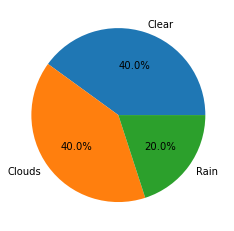

In [14]:
plt.pie(weather_count, labels = weather_labels, autopct = "%1.1f%%")

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/pie_chart.png")


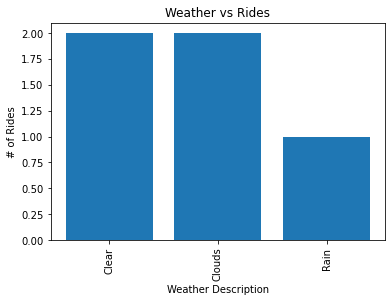

In [15]:
plt.bar(weather_labels, weather_count)
plt.title("Weather vs Rides")
plt.xlabel("Weather Description")
plt.ylabel("# of Rides")
plt.xticks(rotation = 90)

# Save Figure in png file inside Resources folder
plt.savefig("Resources/WeathervsRides.png")

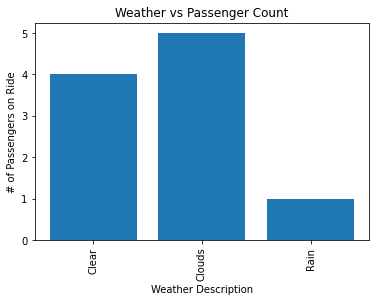

In [16]:
plt.bar(final_df["Description"], final_df["Passenger Count"])
plt.title("Weather vs Passenger Count")
plt.xlabel("Weather Description")
plt.ylabel("# of Passengers on Ride")
plt.xticks(rotation = 90)

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/WeathervsPassengerCount.png")


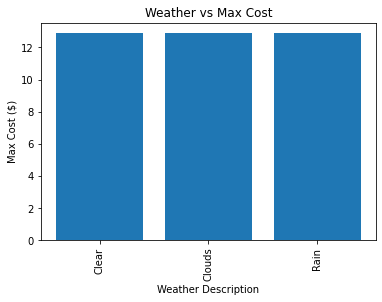

In [17]:
plt.bar(final_df["Description"], final_df["Charge"])
plt.title("Weather vs Max Cost")
plt.xlabel("Weather Description")
plt.ylabel("Max Cost ($)")
plt.xticks(rotation = 90)

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/WeathervsMaxCost.png")

## Latitude vs. Weather

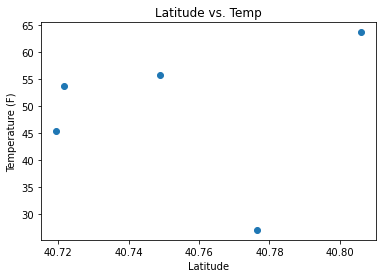

In [18]:
plt.scatter(final_df["Pickup Lat"], final_df["Temp (F)"])
plt.title("Latitude vs. Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/LatvsTemp.png")

R-squared: 0.010121


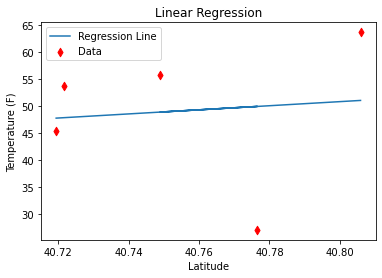

<Figure size 432x288 with 0 Axes>

In [19]:
lregress(final_df["Pickup Lat"], final_df["Temp (F)"], "Temperature (F)")

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/LinearRegressionlattemp.png")

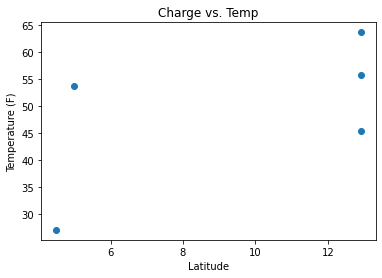

In [20]:
plt.scatter(final_df["Charge"], final_df["Temp (F)"])
plt.title("Charge vs. Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/chargevsTemp.png")

R-squared: 0.357409


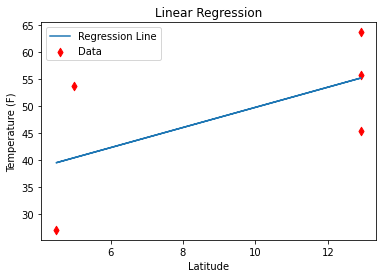

<Figure size 432x288 with 0 Axes>

In [21]:
lregress(final_df["Charge"], final_df["Temp (F)"], "Temperature (F)")

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/LinearRegressionchargetemp.png")